**Stock Market Data Analysis 🚀🚀🚀 🌑🌑🌑**


1. What was the change in price of the stock over time?
2. What was the daily return of the stock on average?
3. What was the moving average of the various stocks?
4. What was the correlation between different stocks' closing prices?
5. What was the correlation between different stocks' daily returns?
6. How much value do we put at risk by investing in a particular stock?
7. How can we attempt to predict future stock behavior?

In [1]:
#import dataframe and visualization libraries 

import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


In [2]:
#read in stonks, timestamps, and division 

import pandas_datareader.data as web
from datetime import datetime
from __future__ import division

In [3]:
#list of stonks

moon = ['GME', 'TSLA', 'AMC', 'MSFT']

In [4]:
#timeframe

end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [5]:
#read in the stocks from yahoo and list defined previously
for stonk in moon:
    globals()[stonk] = web.DataReader(stonk, 'yahoo',start,end)

In [6]:
TSLA.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,498.935874,473.707186,487.224341,487.449762,5.404299e+07,487.449762
std,224.134200,215.093681,220.216357,220.071902,3.039792e+07,220.071902
min,152.399994,136.608002,140.199997,140.264008,1.515770e+07,140.264008
25%,309.588013,293.661987,300.200012,300.127991,3.224520e+07,300.127991
50%,448.880005,426.459991,439.869995,439.670013,4.472280e+07,439.670013
75%,696.599976,666.140015,684.590027,677.000000,7.087350e+07,677.000000
max,900.400024,871.599976,891.380005,883.090027,2.221262e+08,883.090027


In [7]:
TSLA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2020-04-29 to 2021-04-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       253 non-null    float64
 1   Low        253 non-null    float64
 2   Open       253 non-null    float64
 3   Close      253 non-null    float64
 4   Volume     253 non-null    float64
 5   Adj Close  253 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


<AxesSubplot:xlabel='Date'>

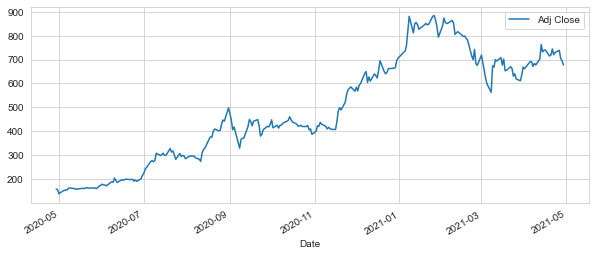

In [8]:
TSLA['Adj Close'].plot(legend=True, figsize=(10,4))

<AxesSubplot:xlabel='Date'>

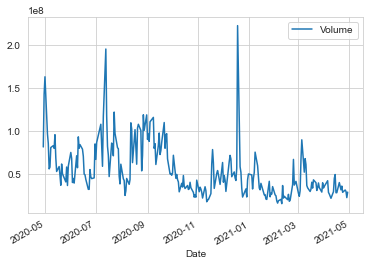

In [9]:
TSLA['Volume'].plot(legend = True)

In [10]:
# Let's go ahead and plot out several moving averages
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    TSLA[column_name] = TSLA['Adj Close'].rolling(ma).mean()

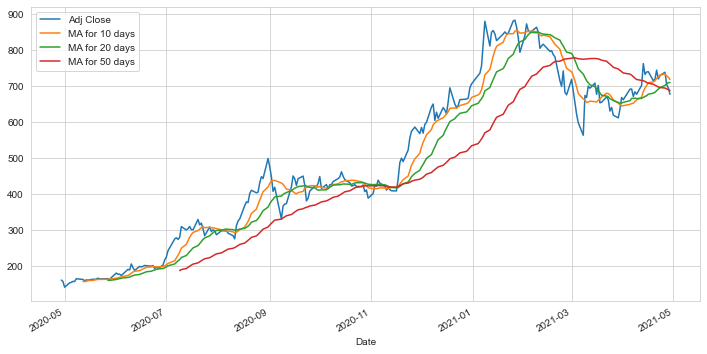

In [11]:
TSLA[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(12,6))
plt.show()

#false is get them all on one plot instead of seperate plots

<AxesSubplot:xlabel='Date'>

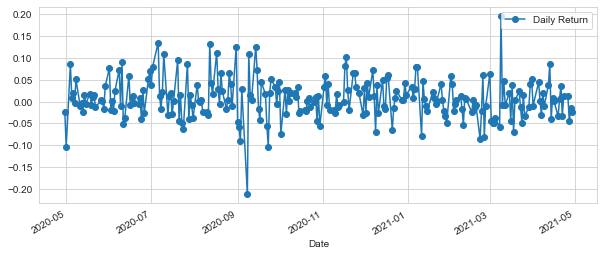

In [12]:
#on a given day, what was your percent return of money. 
#daily return on average using seaborn 

TSLA['Daily Return'] = TSLA['Adj Close'].pct_change()
TSLA['Daily Return'].plot(figsize = (10,4), legend = True, linestyle ='-',marker = 'o')
                                    

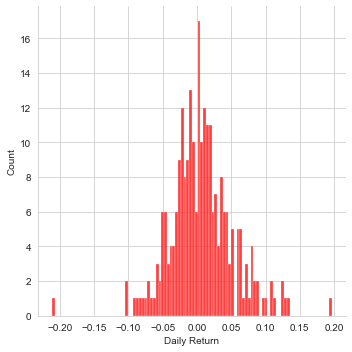

In [13]:
sns.displot(TSLA['Daily Return'].dropna(), bins=100, color='red')
plt.show()

<AxesSubplot:>

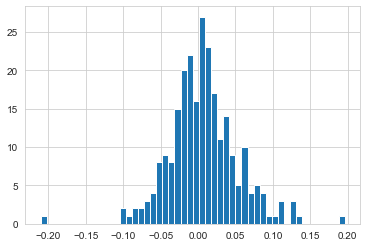

In [14]:
#pandas histogram

TSLA['Daily Return'].hist(bins=50)

In [15]:
#create a new data frame called closing_df

closing_df = web.DataReader(moon, 'yahoo',start,end)['Adj Close']

In [16]:
closing_df.head()

Symbols,GME,TSLA,AMC,MSFT
Date,,,,
2020-04-29,6.04,160.102005,5.19,175.645081
2020-04-30,5.73,156.376007,4.92,177.407196
2020-05-01,6.05,140.264008,4.57,172.813858
2020-05-04,5.48,152.238007,4.30,177.040894
2020-05-05,5.39,153.641998,3.89,178.941589


In [17]:
returns = closing_df.pct_change()

In [18]:
returns.head()

Symbols,GME,TSLA,AMC,MSFT
Date,,,,
2020-04-29,NaN,NaN,NaN,NaN
2020-04-30,-0.051324,-0.023273,-0.052023,0.010032
2020-05-01,0.055846,-0.103034,-0.071138,-0.025891
2020-05-04,-0.094215,0.085368,-0.059081,0.024460
2020-05-05,-0.016423,0.009222,-0.095349,0.010736


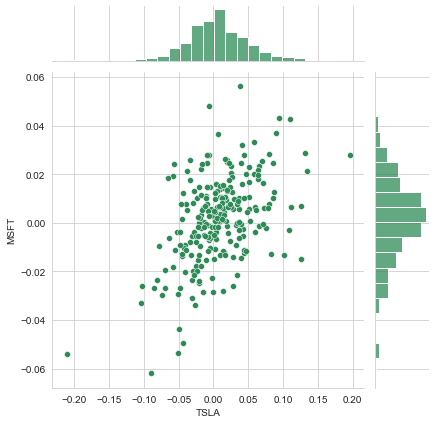

In [19]:
#compare tsla vs msft. 
#joinplot shows relationship between 2 variables

#It may arise warnings, to ignore warnings
import warnings
warnings.filterwarnings('ignore')


sns.jointplot('TSLA','MSFT', returns, kind='scatter', color = 'seagreen')
plt.show()

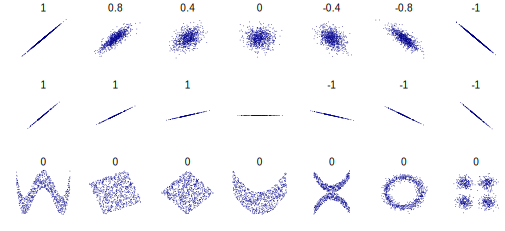

In [20]:
#reference file for correlation

from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

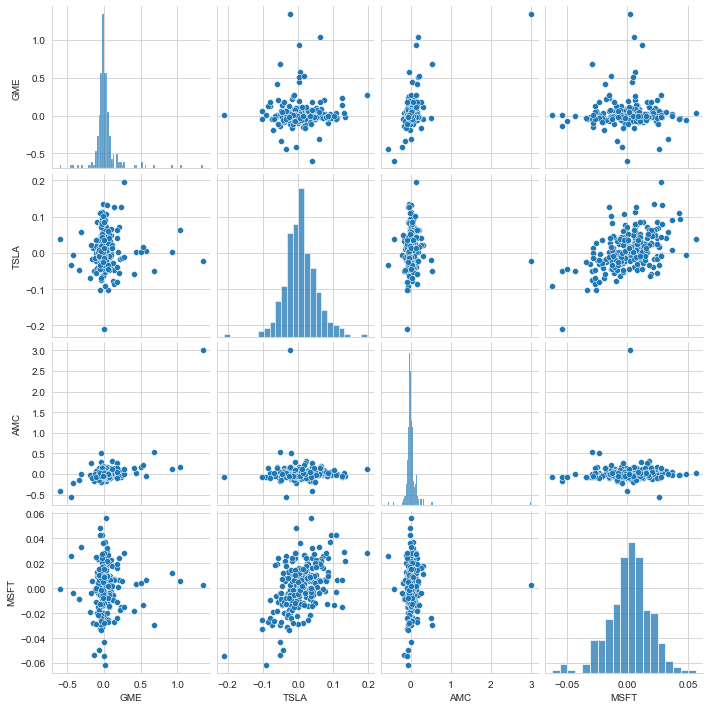

In [21]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(returns.dropna())
plt.show()


In [22]:
returns.head

<bound method NDFrame.head of Symbols          GME      TSLA       AMC      MSFT
Date                                              
2020-04-29       NaN       NaN       NaN       NaN
2020-04-30 -0.051324 -0.023273 -0.052023  0.010032
2020-05-01  0.055846 -0.103034 -0.071138 -0.025891
2020-05-04 -0.094215  0.085368 -0.059081  0.024460
2020-05-05 -0.016423  0.009222 -0.095349  0.010736
...              ...       ...       ...       ...
2021-04-23  0.000066  0.013492  0.017017  0.015476
2021-04-26  0.117410  0.012065  0.131890  0.001532
2021-04-27  0.052329 -0.045326 -0.003478  0.001606
2021-04-28  0.004556 -0.014672 -0.053229 -0.028286
2021-04-29 -0.013383 -0.025058 -0.059908 -0.008053

[253 rows x 4 columns]>

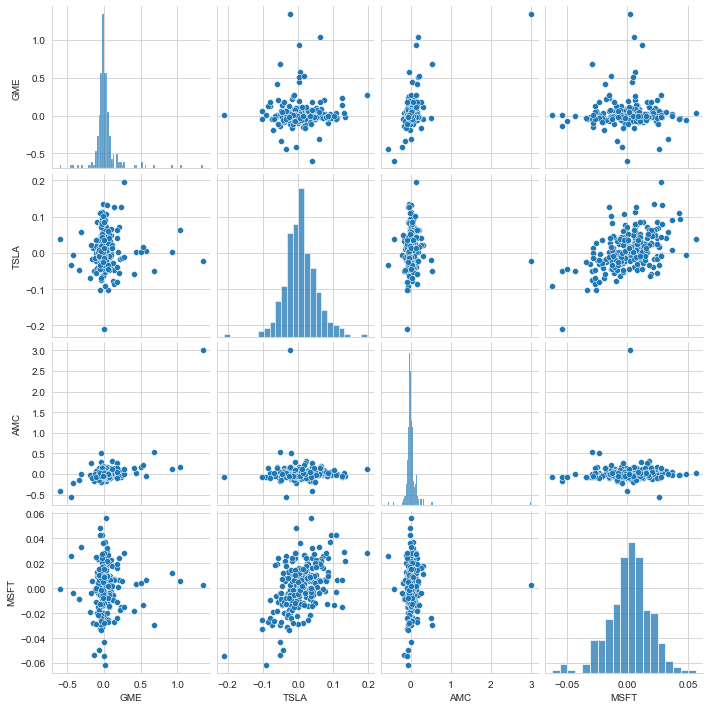

In [23]:
#pairplot - histagram, correlation graphs
sns.pairplot(returns.dropna())

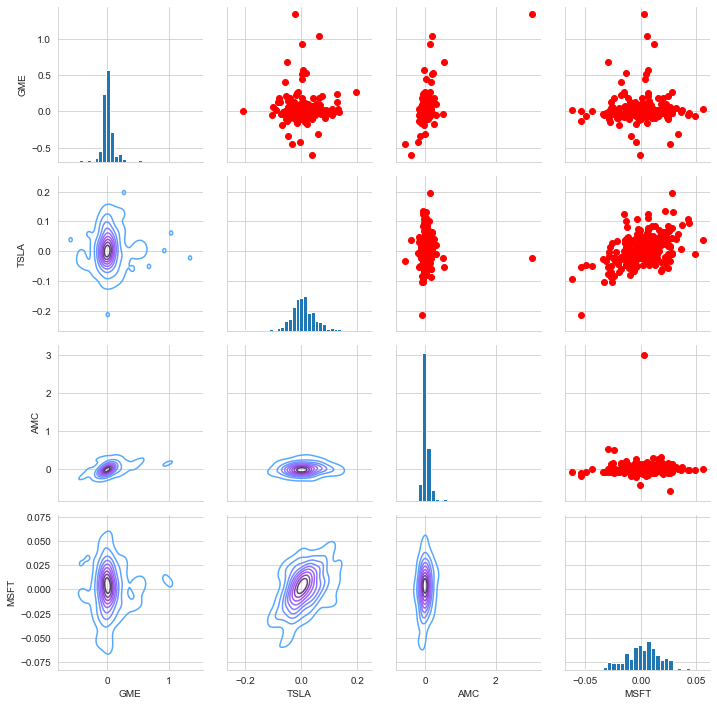

In [24]:
#custom pairgrid
returns_fig = sns.PairGrid(returns.dropna())
returns_fig.map_upper(plt.scatter, color='red')
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

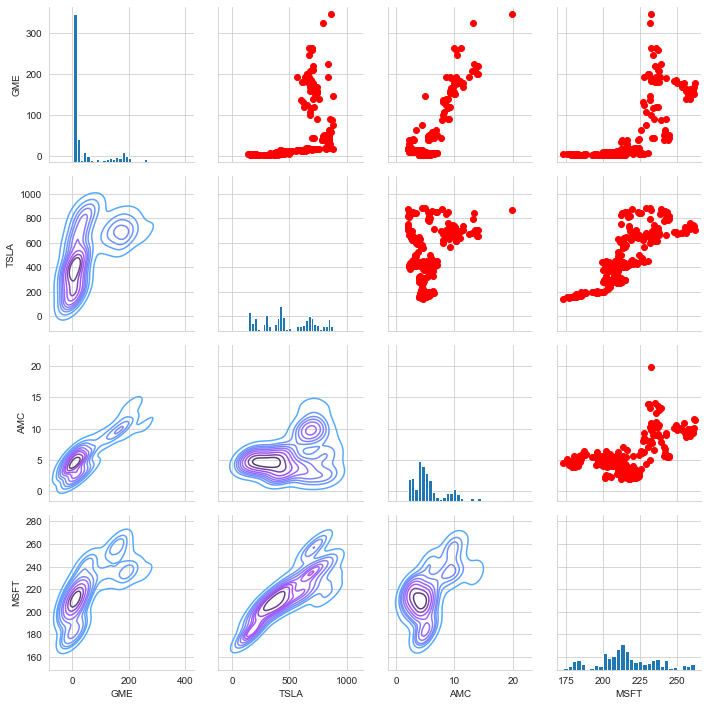

In [25]:
#correlation based on closing prices

#A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, 
#analagous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.
# It uses a kernel density estimate to show the probability density function of the variable 
returns_fig = sns.PairGrid(closing_df.dropna())
returns_fig.map_upper(plt.scatter, color='red')
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

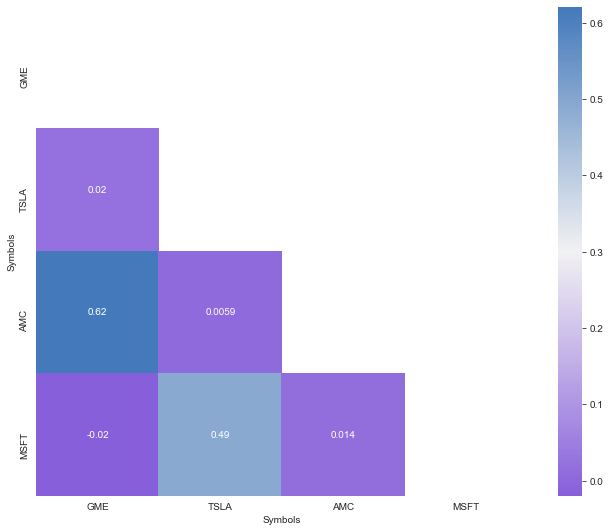

In [31]:
# use sebron for a quick correlation plot for the daily returns

#correlation matrix
corr = returns.dropna().corr()

#make el mask
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(11, 9))

#colormap
cmap = sns.diverging_palette(275, 250, as_cmap=True)

# Draw the heatmap with mask and correct ratio
sns.heatmap(corr, mask=mask, cmap=cmap, annot = True)
plt.show()

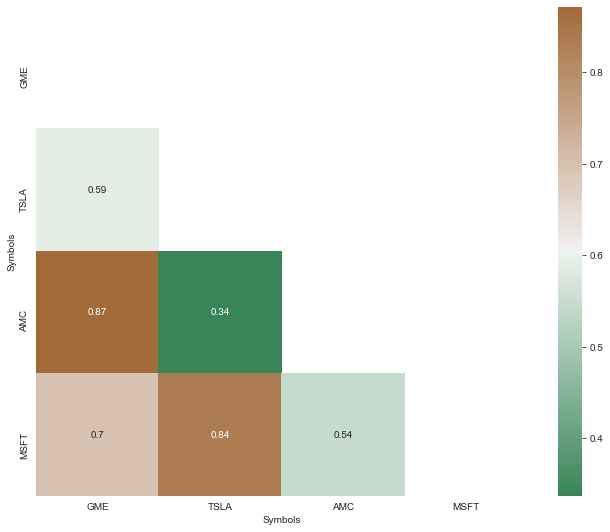

In [32]:
# use sebron for a quick correlation plot for the daily returns

#correlation matrix
corr = closing_df.dropna().corr()

#make el mask
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(11, 9))

#colormap
cmap = sns.diverging_palette(500, 400, as_cmap=True)

# Draw the heatmap with mask and correct ratio
sns.heatmap(corr, mask=mask, cmap=cmap, annot = True)
plt.show()

In [ ]:
rets = returns.dropna()

In [ ]:
#mean std graph

#circles for graph
area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = .5, s=area)

plt.xlabel('Expected Returns')
plt.ylabel('Risk or Std Deviation')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label,
        xy = (x,y), xytext = (50,50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', color='b', connectionstyle = 'arc3,rad=-.3'))
    
    

<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

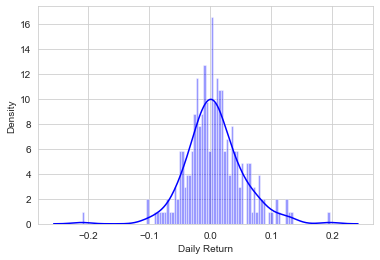

In [27]:
#value at risk - money we are expectnig to lose at a given confidence level
sns.distplot(TSLA['Daily Return'].dropna(), bins = 100, color = 'blue')

In [34]:
returns.head()

Symbols,GME,TSLA,AMC,MSFT
Date,,,,
2020-04-29,NaN,NaN,NaN,NaN
2020-04-30,-0.051324,-0.023273,-0.052023,0.010032
2020-05-01,0.055846,-0.103034,-0.071138,-0.025891
2020-05-04,-0.094215,0.085368,-0.059081,0.024460
2020-05-05,-0.016423,0.009222,-0.095349,0.010736


In [36]:

#only lose 5.9% in a given day 95% of the time
returns['TSLA'].quantile(.05)

-0.058349520343282266

In [42]:
days = 365
dt = 1/days
mu = returns.mean()['TSLA']
sigma = returns.std()['TSLA']

In [48]:
def stock_monte_carlo(start_price,days,mu,sigma):
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu*dt,scale = sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [49]:
TSLA.head()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,
2020-04-29,160.639999,156.632004,158.033997,160.102005,81080000.0,160.102005,NaN,NaN,NaN,NaN
2020-04-30,173.964005,152.699997,171.037994,156.376007,142359500.0,156.376007,NaN,NaN,NaN,-0.023273
2020-05-01,154.554001,136.608002,151.000000,140.264008,162659000.0,140.264008,NaN,NaN,NaN,-0.103034
2020-05-04,152.399994,139.600006,140.199997,152.238007,96185500.0,152.238007,NaN,NaN,NaN,0.085368
2020-05-05,159.783997,152.436005,157.957993,153.641998,84958500.0,153.641998,NaN,NaN,NaN,0.009222


Text(0.5, 1.0, 'Monte Carlo Analysis for TSLA')

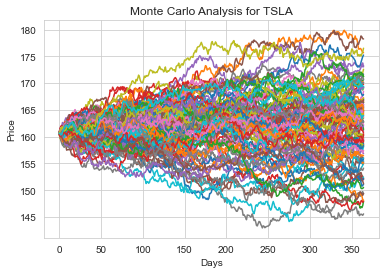

In [50]:
start_price = 160.64

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for TSLA')

In [57]:
runs = 1000

simulation = np.zeros(runs)

for run in range(runs):
    simulation[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

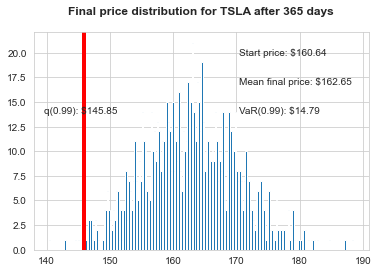

In [58]:
q = np.percentile(simulation,1)

plt.hist(simulation,bins=200)

plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)

# Mean price ending
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulation.mean())

# 99% variance of price
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# plot line at 1% result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for TSLA after %s days\n" % days, weight='bold');

for every share of TSLA you invest, you are risking $15 dollars 99% of the time 